In [69]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

In [70]:
petersen = ig.Graph.Famous('Petersen')

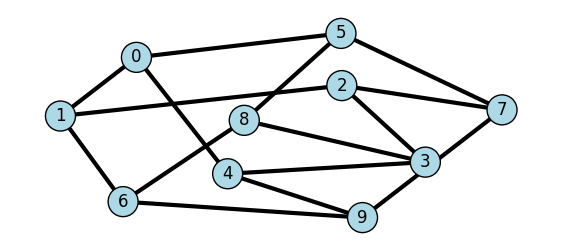

In [71]:
fig, ax = plt.subplots(figsize=(7, 3))
ig.plot(
    petersen,
    target=ax,
    # layout = petersen.layout("sphere"),
    vertex_size=30,
    vertex_label=range(10),
    vertex_color="lightblue",
    edge_width=[3],
    edge_color=["black"]
)

In [72]:
adj_matrix = petersen.get_adjacency()
print(adj_matrix)

[[0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
 [0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 1]
 [1, 0, 0, 0, 0, 0, 0, 1, 1, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
 [0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]]


In [73]:

eigenvalues = np.linalg.eigh(adj_matrix)[0]
eigenvectors = np.linalg.eigh(adj_matrix)[1]
rounded_eigenvalues = np.round(eigenvalues, decimals=1)
reverse_sorted_eigenvalues = np.sort(rounded_eigenvalues)[::-1]

print(rounded_eigenvalues)
print(reverse_sorted_eigenvalues)

[-2. -2. -2. -2.  1.  1.  1.  1.  1.  3.]
[ 3.  1.  1.  1.  1.  1. -2. -2. -2. -2.]


In [75]:
largest_eigenvector = eigenvectors[:, -1]
print(largest_eigenvector)

[-0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777
 -0.31622777 -0.31622777 -0.31622777 -0.31622777]
